In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Q1 
Which is more probable when rolling 2 six-sdied dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities.

In [27]:
prob_snake_eyes =  1/6 * 1/6
prob_sum_to_seven =  (1/6 * 1/6)*6
ratio = prob_snake_eyes/prob_sum_to_seven

print('Probability of rolling snake eyes = {:.2%} '.format(prob_snake_eyes))
print('Probability of rolling seven = {:.2%} '.format(prob_sum_to_seven))
print('The ratio of the two probabilities = {:.2%} '.format(ratio))

Probability of rolling snake eyes = 2.78% 
Probability of rolling seven = 16.67% 
The ratio of the two probabilities = 16.67% 


The probability of rolling seven, 16.67%, is higher than the probability of rolling snake eyes, 2.78%. This means it is more likely to roll seven than roling snake eyes when rolling 2 six-sided dice.

# Q2
Use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram)

Analytical approach:

In [28]:
n = 7
sum = str(n)

for i in range(1, n):
    prob = 1/6*1/6
    sum_prob = prob * i


print('Probability of rolling ' + sum + ' = {:.2%}'.format(sum_prob))

Probability of rolling 7 = 16.67%



Numerical approach:

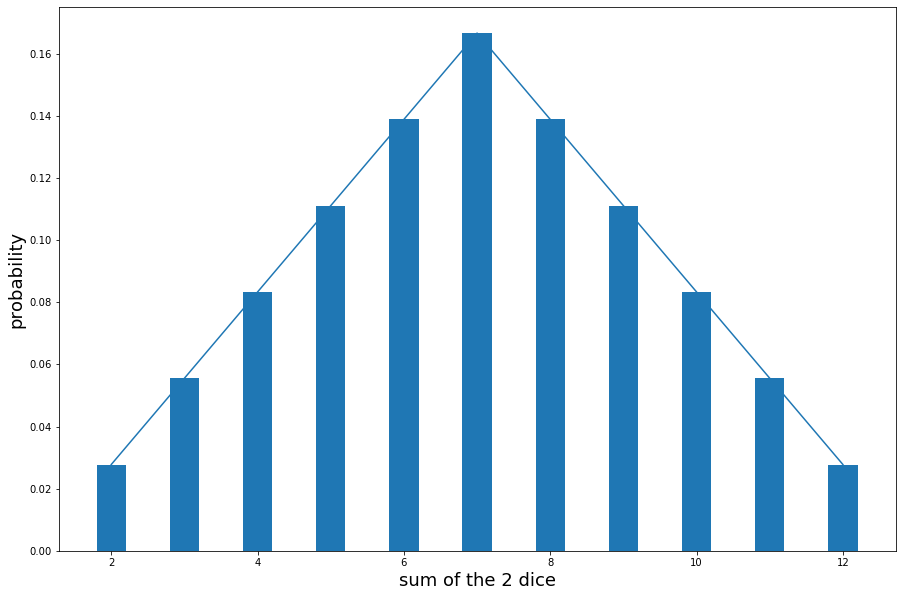

In [56]:
array_x = [0] * 11
array_y = [0] * 11
j=3

for i in range(2, 13):
    prob = 1/6*1/6
    if i<= 7:
        sum_prob = prob * (i-1)
        array_x[i-2] = i
        array_y[i-2] = sum_prob
        
    else:
        sum_prob = prob * (i-j)
        array_x[i-2] = i
        array_y[i-2] = sum_prob
        j+= 2

fig, ax = plt.subplots(1, 1)
ax.plot(array_x,array_y)
ax.bar(array_x,array_y,width=0.4,)
plt.ylabel('probability', fontsize=18)
plt.xlabel('sum of the 2 dice', fontsize=18)
plt.show;

# Q3
Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [74]:
mean = np.mean(array_x)
#np.var(array_x)    the value doesn't make sense
#var = np.sum(array_x**2*array_y - mean**2) doesn't work
x_squared = np.square(array_x)
var = np.sum(np.multiply(x_squared,array_y)) - mean**2

print('Mean of the distribution = {:.2f}'.format(mean))
print('Variance of the distribution = {:.2f}'.format(var))

Mean of the distribution = 7.00
Variance of the distribution = 5.83


Here, using the mathematical equation to calculate makes sense since np.var() return a value 10 which does not make sense. The variance should tell us how much the data is spread out. The end points of x values are 2 and 12 and they are about 5 units away from the mean so the variance of 5.83 make sense. 

# Q4 
Repeat 2, and graph the average of 10 dice. Is this a Gaussian distribution? Explain in depth.

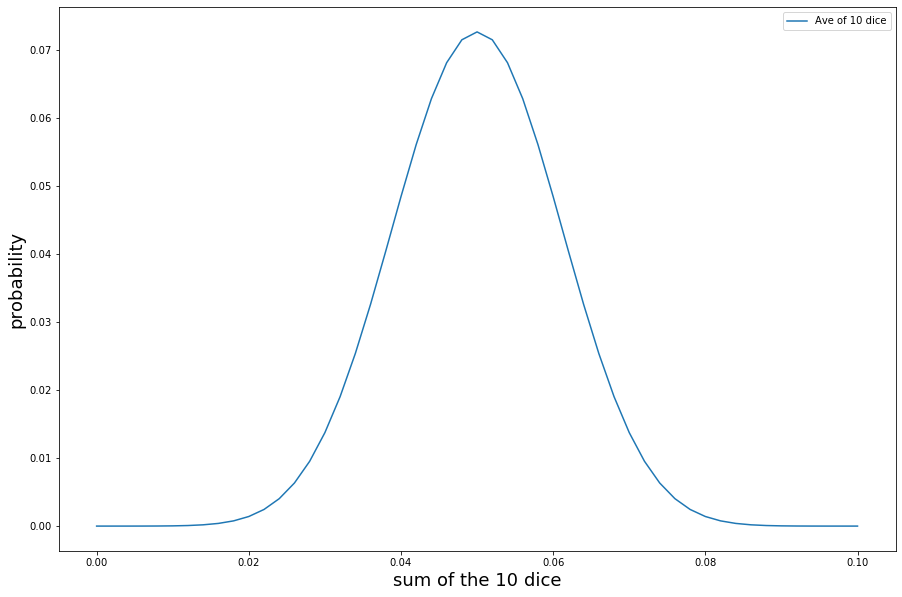

In [87]:
#sum_dist = array_y
dice_prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6,]
sum_dist = dice_prob
    
for i in range(1, 10):
    sum_dist = np.convolve(sum_dist, dice_prob)

plt.rcParams["figure.figsize"] = (15,10)
#x = range(10,61)
fig, ax = plt.subplots(1, 1)
#ax.plot(sum_dist)

#ax.plot(sum_dist);
left, right = plt.xlim()
x_sum = np.linspace(left, right, sum_dist.size)
x_ave = x_sum/10
ax.plot(x_ave,sum_dist,label='Ave of 10 dice');
plt.ylabel('probability', fontsize=18)
plt.xlabel('sum of the 10 dice', fontsize=18)
plt.legend()
plt.show;


In [92]:
mean_value= np.max(sum_dist)

for i in range(0, 51):
    if sum_dist[i] == mean_value:
        mean_x = i
 
left_p = np.sum(sum_dist[0:mean_x])
right_p = np.sum(sum_dist[mean_x:51])
print('Sum of the probability from the mean to left end = {:.2%}'.format(left_p))
print('Sum of the probability from the mean to right end = {:.2%}'.format(right_p))


Sum of the probability from the mean to left end = 46.37%
Sum of the probability from the mean to right end = 53.63%


I calculated the probability from negative infinity to the mean and also the probability from the mean to positive infinity. If my distribution is truely Gaussian the probaiblity to the left of the mean and the right of the mean should equal 50% because Gaussian distribution is symmetrical at the mean. Since the probaiblity is not 50%, this distributio is not a Gaussian. However, the central limit theorem states that the more samples I add, the more the distribution will tend to a Gaussian distribution. So if I increase the number of iterative convolution the plot will be a Guassian distribution. 

# Q5
Show that the sum and average of an initially Gaussian distribution is also a Gaussian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Gaussian change? This is a hugely important result. Explore what this means for integrating asignal over time.

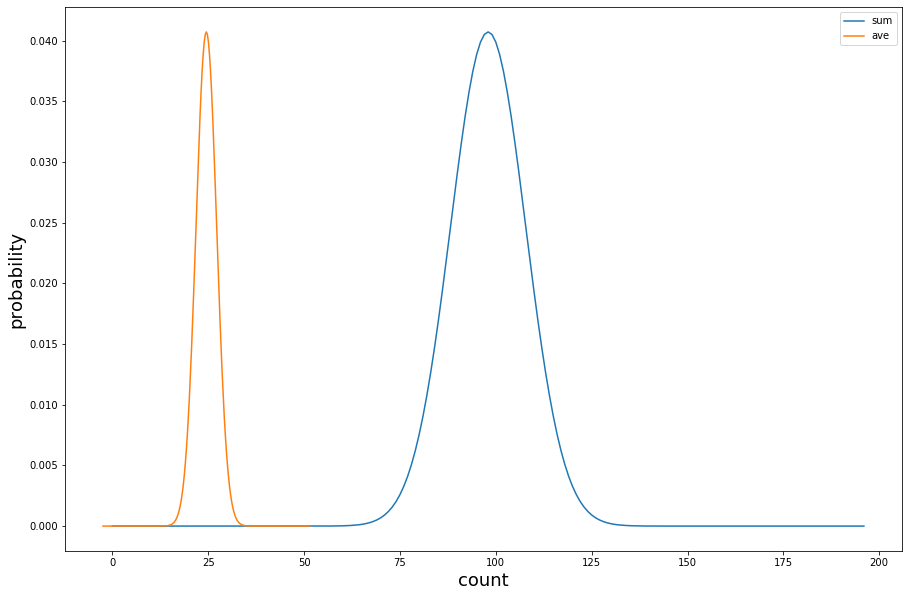

In [93]:
fig, ax = plt.subplots(1,1)
x = np.linspace(0, 10, 50)
norm = stats.norm.pdf(x,loc=5, scale = 1)
sum_dist = norm

n = 4
for i in range(1, n):
    sum_dist = np.convolve(sum_dist, norm)
    
sum_dist = sum_dist/sum_dist.sum()

ax.plot(sum_dist,label='sum');
left, right = plt.xlim()
x_sum = np.linspace(left, right, sum_dist.size)

x_ave = x_sum/4
ax.plot(x_ave, sum_dist,label='ave');
plt.legend()
plt.ylabel('probability', fontsize=18)
plt.xlabel('count', fontsize=18);

In [94]:
sum_std = np.std(x_sum)
ave_std = np.std(x_ave)

print('The standard deviation for the sum distribution is = {:.1f}'.format(sum_std))
print('The standard deviation for the ave distribution is = {:.1f}'.format(ave_std))

The standard deviation for the sum distribution is = 62.6
The standard deviation for the ave distribution is = 15.6


The standard deviation of the sum distribution gets bigger as we increase the number of iteration. 
This make sense because as we increase the number of samples the chances of measuring a value that deviates from the total sample mean increases.  This means the uncertainty increases as we increase the number of samples. However, on average, the uncertainty will decrease so we get a smaller standard deviation for the average distribution as we increase the number of samples.